In [22]:
from numpy import *
def loadSimpData():
    datMat = matrix([[1., 2.1],
                     [2., 1.1],
                     [1.3, 1.],
                     [1., 1.],
                     [2., 1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat, classLabels

In [23]:
datMat, classLabels = loadSimpData()

In [24]:
datMat[:, 0]

matrix([[1. ],
        [2. ],
        [1.3],
        [1. ],
        [2. ]])

In [25]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
    retArray = ones((shape(dataMatrix)[0], 1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    return retArray

def buildStump(dataArr, classLabels, D):
    dataMatrix = mat(dataArr)
    labelMat = mat(classLabels).T
    m, n = shape(dataMatrix)
    # 变量 numSteps 用于在特征的所有可能值上进行遍历
    numSteps = 10.0
    bestStump = {}
    bestClasEst = mat(zeros((m, 1)))
    minError = inf
    #遍历所有特征
    for i in range(n):
        rangeMin = dataMatrix[:,i].min()
        rangeMax = dataMatrix[:,i].max()
        stepSize = (rangeMax - rangeMin) / numSteps
        for j in range(-1, int(numSteps) + 1):
            #'lt' and 'gt' means whether the elements larger than threh is -1 or the elements smaller than threh is -1
            for inequal in ['lt', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                errArr = mat(ones((m, 1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T * errArr
                print('split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f' %\
                      (i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [26]:
D = mat(ones((5, 1)) / 5)
buildStump(datMat, classLabels, D)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.50, thresh ineq

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [27]:
def adaBoostTrainDS(dataArr, classLabels, numIt = 40):
    weakClassArr = []
    m = shape(dataArr)[0]
    # 向量 D 包含了每个数据点的权重，初始化为 1/m, the sum is 1
    D = mat(ones((m, 1)) / m)
    # 记录每个数据点的类别估计累计值
    aggClassEst = mat(zeros((m, 1)))
    for i in range(numIt):
        #classEst is the labels we predicted
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        print('D:', D.T)
        # 计算 alpha，本次单层决策树输出结果的权重
        # 确保没有错误时不会发生除零溢出
        # alpha是一个值
        alpha = float(0.5 * log((1.0 - error) / max(error, 1e-16)))
        print('alpha: ', alpha)
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)
        print('classEst: ', classEst.T)
        # 为下一次迭代计算D
        #alpha即是系数又用于计算下一个D
        expon = multiply(-1 * alpha * mat(classLabels).T, classEst)    #同号为正异号为负
        D = multiply(D, exp(expon))
        D = D / D.sum()
        # 错误率累加计算
        aggClassEst += alpha * classEst
        print('aggClassEst: ', aggClassEst.T)
        # 为了得到二值分类结果调用 sign() 函数
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T, ones((m, 1)))
        errorRate = aggErrors.sum() / m
        print('total error: ', errorRate, '\n')
        if errorRate == 0.0: break
    return aggClassEst#weakClassArr, 

In [28]:
classifierArray = adaBoostTrainDS(datMat, classLabels, 9)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.400
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.200
split: dim 0, thresh 1.50, thresh ineq

In [29]:
classifierArray

matrix([[ 1.17568763],
        [ 2.56198199],
        [-0.77022252],
        [-0.77022252],
        [ 0.61607184]])

In [30]:
def adaClassify(datToClass, classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m, 1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha'] * classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [31]:
adaClassify([[5, 5], [0, 0]], classifierArray)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [12]:
def loadDataSet(fileName):
    #只读一行，得到feature的数量
    numFeat = len(open(fileName).readline().split('\t'))
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        #将所有的feature放到lineArr里
        for i in range(numFeat - 1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        #将最有一位label放到labelMat里
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

In [13]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray = adaBoostTrainDS(datArr, labelArr, 50)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 6, thresh 0.80, thresh ineqal: gt, the weighted error is 0.504
split: dim 6, thresh 1.20, thresh ineqal: lt, the weighted error is 0.564
split: dim 6, thresh 1.20, thresh ineqal: gt, the weighted error is 0.436
split: dim 6, thresh 1.60, thresh ineqal: lt, the weighted error is 0.564
split: dim 6, thresh 1.60, thresh ineqal: gt, the weighted error is 0.436
split: dim 6, thresh 2.00, thresh ineqal: lt, the weighted error is 0.557
split: dim 6, thresh 2.00, thresh ineqal: gt, the weighted error is 0.443
split: dim 6, thresh 2.40, thresh ineqal: lt, the weighted error is 0.557
split: dim 6, thresh 2.40, thresh ineqal: gt, the weighted error is 0.443
split: dim 6, thresh 2.80, thresh ineqal: lt, the weighted error is 0.557
split: dim 6, thresh 2.80, thresh ineqal: gt, the weighted error is 0.443
split: dim 6, thresh 3.20, thresh ineqal: lt, the weighted error is 0.431
split: dim 6, thresh 3.20, thresh ineqal: gt, the weighted error is 0.569
split: dim 6, thresh 3.60, thresh ineq

split: dim 5, thresh -0.40, thresh ineqal: lt, the weighted error is 0.474
split: dim 5, thresh -0.40, thresh ineqal: gt, the weighted error is 0.526
split: dim 5, thresh 0.00, thresh ineqal: lt, the weighted error is 0.415
split: dim 5, thresh 0.00, thresh ineqal: gt, the weighted error is 0.585
split: dim 5, thresh 0.40, thresh ineqal: lt, the weighted error is 0.415
split: dim 5, thresh 0.40, thresh ineqal: gt, the weighted error is 0.585
split: dim 5, thresh 0.80, thresh ineqal: lt, the weighted error is 0.415
split: dim 5, thresh 0.80, thresh ineqal: gt, the weighted error is 0.585
split: dim 5, thresh 1.20, thresh ineqal: lt, the weighted error is 0.520
split: dim 5, thresh 1.20, thresh ineqal: gt, the weighted error is 0.480
split: dim 5, thresh 1.60, thresh ineqal: lt, the weighted error is 0.520
split: dim 5, thresh 1.60, thresh ineqal: gt, the weighted error is 0.480
split: dim 5, thresh 2.00, thresh ineqal: lt, the weighted error is 0.569
split: dim 5, thresh 2.00, thresh in

split: dim 6, thresh 0.80, thresh ineqal: lt, the weighted error is 0.469
split: dim 6, thresh 0.80, thresh ineqal: gt, the weighted error is 0.531
split: dim 6, thresh 1.20, thresh ineqal: lt, the weighted error is 0.519
split: dim 6, thresh 1.20, thresh ineqal: gt, the weighted error is 0.481
split: dim 6, thresh 1.60, thresh ineqal: lt, the weighted error is 0.519
split: dim 6, thresh 1.60, thresh ineqal: gt, the weighted error is 0.481
split: dim 6, thresh 2.00, thresh ineqal: lt, the weighted error is 0.507
split: dim 6, thresh 2.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 6, thresh 2.40, thresh ineqal: lt, the weighted error is 0.507
split: dim 6, thresh 2.40, thresh ineqal: gt, the weighted error is 0.493
split: dim 6, thresh 2.80, thresh ineqal: lt, the weighted error is 0.507
split: dim 6, thresh 2.80, thresh ineqal: gt, the weighted error is 0.493
split: dim 6, thresh 3.20, thresh ineqal: lt, the weighted error is 0.470
split: dim 6, thresh 3.20, thresh ineq

split: dim 1, thresh 7.40, thresh ineqal: lt, the weighted error is 0.475
split: dim 1, thresh 7.40, thresh ineqal: gt, the weighted error is 0.525
split: dim 1, thresh 8.20, thresh ineqal: lt, the weighted error is 0.475
split: dim 1, thresh 8.20, thresh ineqal: gt, the weighted error is 0.525
split: dim 1, thresh 9.00, thresh ineqal: lt, the weighted error is 0.452
split: dim 1, thresh 9.00, thresh ineqal: gt, the weighted error is 0.548
split: dim 2, thresh -4.08, thresh ineqal: lt, the weighted error is 0.548
split: dim 2, thresh -4.08, thresh ineqal: gt, the weighted error is 0.452
split: dim 2, thresh 0.00, thresh ineqal: lt, the weighted error is 0.503
split: dim 2, thresh 0.00, thresh ineqal: gt, the weighted error is 0.497
split: dim 2, thresh 4.08, thresh ineqal: lt, the weighted error is 0.503
split: dim 2, thresh 4.08, thresh ineqal: gt, the weighted error is 0.497
split: dim 2, thresh 8.16, thresh ineqal: lt, the weighted error is 0.503
split: dim 2, thresh 8.16, thresh in

split: dim 2, thresh 12.24, thresh ineqal: lt, the weighted error is 0.510
split: dim 2, thresh 12.24, thresh ineqal: gt, the weighted error is 0.490
split: dim 2, thresh 16.32, thresh ineqal: lt, the weighted error is 0.510
split: dim 2, thresh 16.32, thresh ineqal: gt, the weighted error is 0.490
split: dim 2, thresh 20.40, thresh ineqal: lt, the weighted error is 0.510
split: dim 2, thresh 20.40, thresh ineqal: gt, the weighted error is 0.490
split: dim 2, thresh 24.48, thresh ineqal: lt, the weighted error is 0.510
split: dim 2, thresh 24.48, thresh ineqal: gt, the weighted error is 0.490
split: dim 2, thresh 28.56, thresh ineqal: lt, the weighted error is 0.510
split: dim 2, thresh 28.56, thresh ineqal: gt, the weighted error is 0.490
split: dim 2, thresh 32.64, thresh ineqal: lt, the weighted error is 0.510
split: dim 2, thresh 32.64, thresh ineqal: gt, the weighted error is 0.490
split: dim 2, thresh 36.72, thresh ineqal: lt, the weighted error is 0.492
split: dim 2, thresh 36.7

split: dim 15, thresh -0.40, thresh ineqal: lt, the weighted error is 0.531
split: dim 15, thresh -0.40, thresh ineqal: gt, the weighted error is 0.469
split: dim 15, thresh 0.00, thresh ineqal: lt, the weighted error is 0.457
split: dim 15, thresh 0.00, thresh ineqal: gt, the weighted error is 0.543
split: dim 15, thresh 0.40, thresh ineqal: lt, the weighted error is 0.457
split: dim 15, thresh 0.40, thresh ineqal: gt, the weighted error is 0.543
split: dim 15, thresh 0.80, thresh ineqal: lt, the weighted error is 0.457
split: dim 15, thresh 0.80, thresh ineqal: gt, the weighted error is 0.543
split: dim 15, thresh 1.20, thresh ineqal: lt, the weighted error is 0.471
split: dim 15, thresh 1.20, thresh ineqal: gt, the weighted error is 0.529
split: dim 15, thresh 1.60, thresh ineqal: lt, the weighted error is 0.471
split: dim 15, thresh 1.60, thresh ineqal: gt, the weighted error is 0.529
split: dim 15, thresh 2.00, thresh ineqal: lt, the weighted error is 0.468
split: dim 15, thresh 2

split: dim 16, thresh 0.00, thresh ineqal: gt, the weighted error is 0.497
split: dim 16, thresh 0.50, thresh ineqal: lt, the weighted error is 0.503
split: dim 16, thresh 0.50, thresh ineqal: gt, the weighted error is 0.497
split: dim 16, thresh 1.00, thresh ineqal: lt, the weighted error is 0.510
split: dim 16, thresh 1.00, thresh ineqal: gt, the weighted error is 0.490
split: dim 16, thresh 1.50, thresh ineqal: lt, the weighted error is 0.510
split: dim 16, thresh 1.50, thresh ineqal: gt, the weighted error is 0.490
split: dim 16, thresh 2.00, thresh ineqal: lt, the weighted error is 0.527
split: dim 16, thresh 2.00, thresh ineqal: gt, the weighted error is 0.473
split: dim 16, thresh 2.50, thresh ineqal: lt, the weighted error is 0.527
split: dim 16, thresh 2.50, thresh ineqal: gt, the weighted error is 0.473
split: dim 16, thresh 3.00, thresh ineqal: lt, the weighted error is 0.532
split: dim 16, thresh 3.00, thresh ineqal: gt, the weighted error is 0.468
split: dim 16, thresh 3.5

split: dim 17, thresh 45.00, thresh ineqal: lt, the weighted error is 0.507
split: dim 17, thresh 45.00, thresh ineqal: gt, the weighted error is 0.493
split: dim 17, thresh 52.50, thresh ineqal: lt, the weighted error is 0.527
split: dim 17, thresh 52.50, thresh ineqal: gt, the weighted error is 0.473
split: dim 17, thresh 60.00, thresh ineqal: lt, the weighted error is 0.528
split: dim 17, thresh 60.00, thresh ineqal: gt, the weighted error is 0.472
split: dim 17, thresh 67.50, thresh ineqal: lt, the weighted error is 0.506
split: dim 17, thresh 67.50, thresh ineqal: gt, the weighted error is 0.494
split: dim 17, thresh 75.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 17, thresh 75.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh -8.90, thresh ineqal: lt, the weighted error is 0.500
split: dim 18, thresh -8.90, thresh ineqal: gt, the weighted error is 0.500
split: dim 18, thresh 0.00, thresh ineqal: lt, the weighted error is 0.457
split: dim 18

  -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1.]]
aggClassEst:  [[-4.09543656e-01  5.26407952e-01  1.13744899e+00 -2.34841212e-01
  -6.32795606e-01  1.39898149e+00  1.14062312e+00  5.20947035e-01
  -8.68196335e-01  5.57328458e-01  2.46043468e-01  8.14261277e-01
   1.44517050e+00  4.83921235e-01  1.03493895e+00 -5.69973725e-01
  -1.51389734e+00  5.87806181e-01  3.26154873e-01 -6.09905446e-01
  -2.54988564e-02  1.74451275e+00  1.15020608e+00  1.11093631e+00
   4.36178477e-01  2.64618464e-01  2.37223290e-01  1.03061834e+00
   3.07116637e-01  2.10233871e+00 -9.57263969e-01  2.16938992e-01
   8.71551037e-01  6.36372290e-01 -6.05287574e-01 -2.02426117e+00
  -6.06781215e-02 -5.12647893e-02  1.64525074e+00  6.47120534e-02
  -1.80458582e+00  3.02386711e-01  3.84456114e-01 -7.89239263e-01
  -1.04028815e+00 -1.34997261e+00 -1.08026892e+00  1.64525074e+00
  -7.72197286e-01 -1.29015644e+00  1.32618120e+00  3.97416313e-01
   1.09443411e+00  5.87806181e-01 -7.36665882e-03  2.45597906e-02
   3.07116637e

split: dim 4, thresh 76.80, thresh ineqal: gt, the weighted error is 0.491
split: dim 4, thresh 86.40, thresh ineqal: lt, the weighted error is 0.505
split: dim 4, thresh 86.40, thresh ineqal: gt, the weighted error is 0.495
split: dim 4, thresh 96.00, thresh ineqal: lt, the weighted error is 0.511
split: dim 4, thresh 96.00, thresh ineqal: gt, the weighted error is 0.489
split: dim 5, thresh -0.40, thresh ineqal: lt, the weighted error is 0.489
split: dim 5, thresh -0.40, thresh ineqal: gt, the weighted error is 0.511
split: dim 5, thresh 0.00, thresh ineqal: lt, the weighted error is 0.471
split: dim 5, thresh 0.00, thresh ineqal: gt, the weighted error is 0.529
split: dim 5, thresh 0.40, thresh ineqal: lt, the weighted error is 0.471
split: dim 5, thresh 0.40, thresh ineqal: gt, the weighted error is 0.529
split: dim 5, thresh 0.80, thresh ineqal: lt, the weighted error is 0.471
split: dim 5, thresh 0.80, thresh ineqal: gt, the weighted error is 0.529
split: dim 5, thresh 1.20, thre

split: dim 13, thresh 0.30, thresh ineqal: lt, the weighted error is 0.523
split: dim 13, thresh 0.30, thresh ineqal: gt, the weighted error is 0.477
split: dim 13, thresh 0.60, thresh ineqal: lt, the weighted error is 0.523
split: dim 13, thresh 0.60, thresh ineqal: gt, the weighted error is 0.477
split: dim 13, thresh 0.90, thresh ineqal: lt, the weighted error is 0.523
split: dim 13, thresh 0.90, thresh ineqal: gt, the weighted error is 0.477
split: dim 13, thresh 1.20, thresh ineqal: lt, the weighted error is 0.527
split: dim 13, thresh 1.20, thresh ineqal: gt, the weighted error is 0.473
split: dim 13, thresh 1.50, thresh ineqal: lt, the weighted error is 0.527
split: dim 13, thresh 1.50, thresh ineqal: gt, the weighted error is 0.473
split: dim 13, thresh 1.80, thresh ineqal: lt, the weighted error is 0.527
split: dim 13, thresh 1.80, thresh ineqal: gt, the weighted error is 0.473
split: dim 13, thresh 2.10, thresh ineqal: lt, the weighted error is 0.514
split: dim 13, thresh 2.1

split: dim 6, thresh 0.80, thresh ineqal: gt, the weighted error is 0.524
split: dim 6, thresh 1.20, thresh ineqal: lt, the weighted error is 0.507
split: dim 6, thresh 1.20, thresh ineqal: gt, the weighted error is 0.493
split: dim 6, thresh 1.60, thresh ineqal: lt, the weighted error is 0.507
split: dim 6, thresh 1.60, thresh ineqal: gt, the weighted error is 0.493
split: dim 6, thresh 2.00, thresh ineqal: lt, the weighted error is 0.493
split: dim 6, thresh 2.00, thresh ineqal: gt, the weighted error is 0.507
split: dim 6, thresh 2.40, thresh ineqal: lt, the weighted error is 0.493
split: dim 6, thresh 2.40, thresh ineqal: gt, the weighted error is 0.507
split: dim 6, thresh 2.80, thresh ineqal: lt, the weighted error is 0.493
split: dim 6, thresh 2.80, thresh ineqal: gt, the weighted error is 0.507
split: dim 6, thresh 3.20, thresh ineqal: lt, the weighted error is 0.503
split: dim 6, thresh 3.20, thresh ineqal: gt, the weighted error is 0.497
split: dim 6, thresh 3.60, thresh ineq

split: dim 14, thresh 5.25, thresh ineqal: gt, the weighted error is 0.507
split: dim 14, thresh 6.00, thresh ineqal: lt, the weighted error is 0.487
split: dim 14, thresh 6.00, thresh ineqal: gt, the weighted error is 0.513
split: dim 14, thresh 6.75, thresh ineqal: lt, the weighted error is 0.493
split: dim 14, thresh 6.75, thresh ineqal: gt, the weighted error is 0.507
split: dim 14, thresh 7.50, thresh ineqal: lt, the weighted error is 0.476
split: dim 14, thresh 7.50, thresh ineqal: gt, the weighted error is 0.524
split: dim 15, thresh -0.40, thresh ineqal: lt, the weighted error is 0.524
split: dim 15, thresh -0.40, thresh ineqal: gt, the weighted error is 0.476
split: dim 15, thresh 0.00, thresh ineqal: lt, the weighted error is 0.491
split: dim 15, thresh 0.00, thresh ineqal: gt, the weighted error is 0.509
split: dim 15, thresh 0.40, thresh ineqal: lt, the weighted error is 0.491
split: dim 15, thresh 0.40, thresh ineqal: gt, the weighted error is 0.509
split: dim 15, thresh 0

split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.508
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.50, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.60, thresh ineq

split: dim 6, thresh 3.60, thresh ineqal: lt, the weighted error is 0.514
split: dim 6, thresh 3.60, thresh ineqal: gt, the weighted error is 0.486
split: dim 6, thresh 4.00, thresh ineqal: lt, the weighted error is 0.504
split: dim 6, thresh 4.00, thresh ineqal: gt, the weighted error is 0.496
split: dim 7, thresh -0.60, thresh ineqal: lt, the weighted error is 0.496
split: dim 7, thresh -0.60, thresh ineqal: gt, the weighted error is 0.504
split: dim 7, thresh 0.00, thresh ineqal: lt, the weighted error is 0.493
split: dim 7, thresh 0.00, thresh ineqal: gt, the weighted error is 0.507
split: dim 7, thresh 0.60, thresh ineqal: lt, the weighted error is 0.493
split: dim 7, thresh 0.60, thresh ineqal: gt, the weighted error is 0.507
split: dim 7, thresh 1.20, thresh ineqal: lt, the weighted error is 0.513
split: dim 7, thresh 1.20, thresh ineqal: gt, the weighted error is 0.487
split: dim 7, thresh 1.80, thresh ineqal: lt, the weighted error is 0.513
split: dim 7, thresh 1.80, thresh in

split: dim 20, thresh 2.02, thresh ineqal: gt, the weighted error is 0.518
split: dim 20, thresh 3.03, thresh ineqal: lt, the weighted error is 0.505
split: dim 20, thresh 3.03, thresh ineqal: gt, the weighted error is 0.495
split: dim 20, thresh 4.04, thresh ineqal: lt, the weighted error is 0.497
split: dim 20, thresh 4.04, thresh ineqal: gt, the weighted error is 0.503
split: dim 20, thresh 5.05, thresh ineqal: lt, the weighted error is 0.499
split: dim 20, thresh 5.05, thresh ineqal: gt, the weighted error is 0.501
split: dim 20, thresh 6.06, thresh ineqal: lt, the weighted error is 0.497
split: dim 20, thresh 6.06, thresh ineqal: gt, the weighted error is 0.503
split: dim 20, thresh 7.07, thresh ineqal: lt, the weighted error is 0.503
split: dim 20, thresh 7.07, thresh ineqal: gt, the weighted error is 0.497
split: dim 20, thresh 8.08, thresh ineqal: lt, the weighted error is 0.499
split: dim 20, thresh 8.08, thresh ineqal: gt, the weighted error is 0.501
split: dim 20, thresh 9.0

split: dim 3, thresh 128.80, thresh ineqal: lt, the weighted error is 0.507
split: dim 3, thresh 128.80, thresh ineqal: gt, the weighted error is 0.493
split: dim 3, thresh 147.20, thresh ineqal: lt, the weighted error is 0.507
split: dim 3, thresh 147.20, thresh ineqal: gt, the weighted error is 0.493
split: dim 3, thresh 165.60, thresh ineqal: lt, the weighted error is 0.494
split: dim 3, thresh 165.60, thresh ineqal: gt, the weighted error is 0.506
split: dim 3, thresh 184.00, thresh ineqal: lt, the weighted error is 0.488
split: dim 3, thresh 184.00, thresh ineqal: gt, the weighted error is 0.512
split: dim 4, thresh -9.60, thresh ineqal: lt, the weighted error is 0.512
split: dim 4, thresh -9.60, thresh ineqal: gt, the weighted error is 0.488
split: dim 4, thresh 0.00, thresh ineqal: lt, the weighted error is 0.482
split: dim 4, thresh 0.00, thresh ineqal: gt, the weighted error is 0.518
split: dim 4, thresh 9.60, thresh ineqal: lt, the weighted error is 0.487
split: dim 4, thresh

split: dim 11, thresh 0.00, thresh ineqal: lt, the weighted error is 0.492
split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.508
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.492
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.508
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.492
split: dim 11, thresh 0.80, thresh ineqal: gt, the weighted error is 0.508
split: dim 11, thresh 1.20, thresh ineqal: lt, the weighted error is 0.514
split: dim 11, thresh 1.20, thresh ineqal: gt, the weighted error is 0.486
split: dim 11, thresh 1.60, thresh ineqal: lt, the weighted error is 0.514
split: dim 11, thresh 1.60, thresh ineqal: gt, the weighted error is 0.486
split: dim 11, thresh 2.00, thresh ineqal: lt, the weighted error is 0.502
split: dim 11, thresh 2.00, thresh ineqal: gt, the weighted error is 0.498
split: dim 11, thresh 2.40, thresh ineqal: lt, the weighted error is 0.502
split: dim 11, thresh 2.4

split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.50, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.60, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.60, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.70, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.70, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.80, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.80, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 1.90, thresh ineqal: lt, the weighted error is 0.496
split: dim 0, thresh 1.90, thresh ineqal: gt, the weighted error is 0.504
split: dim 0, thresh 2.00, thresh ineqal: lt, the weighted error is 0.491
split: dim 0, thresh 2.00, thresh ineqal: gt, the weighted error is 0.509
split: dim 1, thresh 0.20, thresh ineqal: lt, the weighted error is 0.509
split: dim 1, thresh 0.20, thresh ineq

split: dim 19, thresh 0.00, thresh ineqal: gt, the weighted error is 0.520
split: dim 19, thresh 0.30, thresh ineqal: lt, the weighted error is 0.480
split: dim 19, thresh 0.30, thresh ineqal: gt, the weighted error is 0.520
split: dim 19, thresh 0.60, thresh ineqal: lt, the weighted error is 0.480
split: dim 19, thresh 0.60, thresh ineqal: gt, the weighted error is 0.520
split: dim 19, thresh 0.90, thresh ineqal: lt, the weighted error is 0.480
split: dim 19, thresh 0.90, thresh ineqal: gt, the weighted error is 0.520
split: dim 19, thresh 1.20, thresh ineqal: lt, the weighted error is 0.518
split: dim 19, thresh 1.20, thresh ineqal: gt, the weighted error is 0.482
split: dim 19, thresh 1.50, thresh ineqal: lt, the weighted error is 0.518
split: dim 19, thresh 1.50, thresh ineqal: gt, the weighted error is 0.482
split: dim 19, thresh 1.80, thresh ineqal: lt, the weighted error is 0.518
split: dim 19, thresh 1.80, thresh ineqal: gt, the weighted error is 0.482
split: dim 19, thresh 2.1

split: dim 18, thresh 71.20, thresh ineqal: gt, the weighted error is 0.490
split: dim 18, thresh 80.10, thresh ineqal: lt, the weighted error is 0.510
split: dim 18, thresh 80.10, thresh ineqal: gt, the weighted error is 0.490
split: dim 18, thresh 89.00, thresh ineqal: lt, the weighted error is 0.491
split: dim 18, thresh 89.00, thresh ineqal: gt, the weighted error is 0.509
split: dim 19, thresh -0.30, thresh ineqal: lt, the weighted error is 0.509
split: dim 19, thresh -0.30, thresh ineqal: gt, the weighted error is 0.491
split: dim 19, thresh 0.00, thresh ineqal: lt, the weighted error is 0.483
split: dim 19, thresh 0.00, thresh ineqal: gt, the weighted error is 0.517
split: dim 19, thresh 0.30, thresh ineqal: lt, the weighted error is 0.483
split: dim 19, thresh 0.30, thresh ineqal: gt, the weighted error is 0.517
split: dim 19, thresh 0.60, thresh ineqal: lt, the weighted error is 0.483
split: dim 19, thresh 0.60, thresh ineqal: gt, the weighted error is 0.517
split: dim 19, thr

In [14]:
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
prediction10 = adaClassify(testArr, classifierArray)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
errArr = mat(ones((67, 1)))
errArr[prediction10 != mat(testLabelArr).T].sum()

In [15]:
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    cur = (1.0, 1.0)
    ySum = 0.0
    numPosClas = sum(array(classLabels) == 1.0)
    yStep = 1 / float(numPosClas)
    xStep = 1 / float(len(classLabels) - numPosClas)
    sortedIndicies = predStrengths.argsort()
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]    #每次x值改变（w变1）才需要增加面积
        ax.plot([cur[0], cur[0] - delX], [cur[1], cur[1] - delY], c = 'b')
        cur = (cur[0] - delX, cur[1] - delY)
    ax.plot([0, 1], [0, 1], 'b--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for AdaBoost Horse Colic Detection System')
    ax.axis([0, 1, 0, 1])
    plt.show()
    print('the Area Under the Curve is: ', ySum * xStep)

In [16]:
datArr, labelArr = loadDataSet('horseColicTraining2.txt')
aggClassEst = adaBoostTrainDS(datArr, labelArr, 40)

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.405
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.595
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.562
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.438
split: dim 0, thresh 1.50, thresh ineq

split: dim 15, thresh 0.80, thresh ineqal: lt, the weighted error is 0.457
split: dim 15, thresh 0.80, thresh ineqal: gt, the weighted error is 0.543
split: dim 15, thresh 1.20, thresh ineqal: lt, the weighted error is 0.482
split: dim 15, thresh 1.20, thresh ineqal: gt, the weighted error is 0.518
split: dim 15, thresh 1.60, thresh ineqal: lt, the weighted error is 0.482
split: dim 15, thresh 1.60, thresh ineqal: gt, the weighted error is 0.518
split: dim 15, thresh 2.00, thresh ineqal: lt, the weighted error is 0.477
split: dim 15, thresh 2.00, thresh ineqal: gt, the weighted error is 0.523
split: dim 15, thresh 2.40, thresh ineqal: lt, the weighted error is 0.477
split: dim 15, thresh 2.40, thresh ineqal: gt, the weighted error is 0.523
split: dim 15, thresh 2.80, thresh ineqal: lt, the weighted error is 0.477
split: dim 15, thresh 2.80, thresh ineqal: gt, the weighted error is 0.523
split: dim 15, thresh 3.20, thresh ineqal: lt, the weighted error is 0.489
split: dim 15, thresh 3.2

split: dim 13, thresh 3.00, thresh ineqal: gt, the weighted error is 0.474
split: dim 14, thresh -0.75, thresh ineqal: lt, the weighted error is 0.474
split: dim 14, thresh -0.75, thresh ineqal: gt, the weighted error is 0.526
split: dim 14, thresh 0.00, thresh ineqal: lt, the weighted error is 0.558
split: dim 14, thresh 0.00, thresh ineqal: gt, the weighted error is 0.442
split: dim 14, thresh 0.75, thresh ineqal: lt, the weighted error is 0.558
split: dim 14, thresh 0.75, thresh ineqal: gt, the weighted error is 0.442
split: dim 14, thresh 1.50, thresh ineqal: lt, the weighted error is 0.551
split: dim 14, thresh 1.50, thresh ineqal: gt, the weighted error is 0.449
split: dim 14, thresh 2.25, thresh ineqal: lt, the weighted error is 0.544
split: dim 14, thresh 2.25, thresh ineqal: gt, the weighted error is 0.456
split: dim 14, thresh 3.00, thresh ineqal: lt, the weighted error is 0.554
split: dim 14, thresh 3.00, thresh ineqal: gt, the weighted error is 0.446
split: dim 14, thresh 3

  -1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1.]]
aggClassEst:  [[-0.81167381  0.95454879  1.06222816  0.11165095 -0.53243313  1.36677554
   1.06222816  0.41619833 -0.50712643 -0.13016868  0.41619833  0.4886087
   1.36677554  0.79315608  0.88213842 -0.50712643 -1.13209133  0.66615124
   0.4886087  -0.51331395 -0.13016868  1.36677554  1.06222816  0.95454879
   0.88213842  0.09253177  0.41619833  0.68527041  0.66615124  1.52816825
  -1.13209133  0.11165095  0.79315608  0.4886087  -0.50712643 -1.43663871
   0.09253177 -0.59374087  1.06222816  0.09253177 -1.43663871  0.09253177
   0.11165095 -0.34573372 -0.66615124 -1.43663871 -1.13209133  1.06222816
  -0.20876657 -1.43663871  1.06222816  0.4886087   1.06222816  0.66615124
  -0.20876657  0.41619833  0.66615124 -0.13016868 -0.55847187 -1.43663871
   1.06222816  0.79315608 -0.22788575 -0.04737386  0.11165095  0.57759104
   0.32958389  1.36677554  0.34573372  1.06222816  0.02012141  1.36677554
   0.09253177 -0.18151412  0.66615124  0.11165095  

split: dim 10, thresh 3.20, thresh ineqal: gt, the weighted error is 0.504
split: dim 10, thresh 3.60, thresh ineqal: lt, the weighted error is 0.496
split: dim 10, thresh 3.60, thresh ineqal: gt, the weighted error is 0.504
split: dim 10, thresh 4.00, thresh ineqal: lt, the weighted error is 0.452
split: dim 10, thresh 4.00, thresh ineqal: gt, the weighted error is 0.548
split: dim 11, thresh -0.40, thresh ineqal: lt, the weighted error is 0.548
split: dim 11, thresh -0.40, thresh ineqal: gt, the weighted error is 0.452
split: dim 11, thresh 0.00, thresh ineqal: lt, the weighted error is 0.495
split: dim 11, thresh 0.00, thresh ineqal: gt, the weighted error is 0.505
split: dim 11, thresh 0.40, thresh ineqal: lt, the weighted error is 0.495
split: dim 11, thresh 0.40, thresh ineqal: gt, the weighted error is 0.505
split: dim 11, thresh 0.80, thresh ineqal: lt, the weighted error is 0.495
split: dim 11, thresh 0.80, thresh ineqal: gt, the weighted error is 0.505
split: dim 11, thresh 1

split: dim 16, thresh 2.50, thresh ineqal: gt, the weighted error is 0.470
split: dim 16, thresh 3.00, thresh ineqal: lt, the weighted error is 0.535
split: dim 16, thresh 3.00, thresh ineqal: gt, the weighted error is 0.465
split: dim 16, thresh 3.50, thresh ineqal: lt, the weighted error is 0.535
split: dim 16, thresh 3.50, thresh ineqal: gt, the weighted error is 0.465
split: dim 16, thresh 4.00, thresh ineqal: lt, the weighted error is 0.519
split: dim 16, thresh 4.00, thresh ineqal: gt, the weighted error is 0.481
split: dim 16, thresh 4.50, thresh ineqal: lt, the weighted error is 0.519
split: dim 16, thresh 4.50, thresh ineqal: gt, the weighted error is 0.481
split: dim 16, thresh 5.00, thresh ineqal: lt, the weighted error is 0.449
split: dim 16, thresh 5.00, thresh ineqal: gt, the weighted error is 0.551
split: dim 17, thresh -7.50, thresh ineqal: lt, the weighted error is 0.551
split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.449
split: dim 17, thresh 0

aggClassEst:  [[-0.41659304  0.51432164  1.13039961 -0.27965884 -0.48455387  1.43494699
   0.93598941  0.55691254 -0.45547619  0.53186505  0.04140976  0.8072119
   1.24053679  0.65604216  1.02285264 -0.61479135 -1.31811575  0.77381616
   0.31910549 -0.46166371 -0.03254824  1.53987904  1.1431567   1.0749708
   0.24039689  0.45062844  0.23017391  0.82598463  0.5361415   1.90655712
  -1.0020816  -0.02546297  0.66691733  0.62932291 -0.40950598 -1.63542022
  -0.11002072 -0.44010574  1.44061703  0.21295379 -1.58945001  0.45062844
   0.1798224  -0.78218988 -0.83565444 -1.35177535 -1.28490263  1.44061703
  -0.60007636 -1.11803551  1.13039961  0.56953724  1.13039961  0.77381616
  -0.05218429 -0.02025784  0.5361415  -0.03254824 -0.71128317 -1.35177535
   1.38083136  1.17154495 -0.39738895 -0.24615537 -0.01270588  0.65851959
   0.19246997  1.74516441  0.2086198   1.44061703 -0.07372805  1.50748975
  -0.03747796 -0.55630269  0.5361415  -0.05785225  1.29192472  1.90655712
  -0.08631827 -0.2065974  

split: dim 6, thresh 1.20, thresh ineqal: gt, the weighted error is 0.493
split: dim 6, thresh 1.60, thresh ineqal: lt, the weighted error is 0.507
split: dim 6, thresh 1.60, thresh ineqal: gt, the weighted error is 0.493
split: dim 6, thresh 2.00, thresh ineqal: lt, the weighted error is 0.493
split: dim 6, thresh 2.00, thresh ineqal: gt, the weighted error is 0.507
split: dim 6, thresh 2.40, thresh ineqal: lt, the weighted error is 0.493
split: dim 6, thresh 2.40, thresh ineqal: gt, the weighted error is 0.507
split: dim 6, thresh 2.80, thresh ineqal: lt, the weighted error is 0.493
split: dim 6, thresh 2.80, thresh ineqal: gt, the weighted error is 0.507
split: dim 6, thresh 3.20, thresh ineqal: lt, the weighted error is 0.483
split: dim 6, thresh 3.20, thresh ineqal: gt, the weighted error is 0.517
split: dim 6, thresh 3.60, thresh ineqal: lt, the weighted error is 0.483
split: dim 6, thresh 3.60, thresh ineqal: gt, the weighted error is 0.517
split: dim 6, thresh 4.00, thresh ineq

split: dim 17, thresh -7.50, thresh ineqal: gt, the weighted error is 0.488
split: dim 17, thresh 0.00, thresh ineqal: lt, the weighted error is 0.473
split: dim 17, thresh 0.00, thresh ineqal: gt, the weighted error is 0.527
split: dim 17, thresh 7.50, thresh ineqal: lt, the weighted error is 0.473
split: dim 17, thresh 7.50, thresh ineqal: gt, the weighted error is 0.527
split: dim 17, thresh 15.00, thresh ineqal: lt, the weighted error is 0.473
split: dim 17, thresh 15.00, thresh ineqal: gt, the weighted error is 0.527
split: dim 17, thresh 22.50, thresh ineqal: lt, the weighted error is 0.473
split: dim 17, thresh 22.50, thresh ineqal: gt, the weighted error is 0.527
split: dim 17, thresh 30.00, thresh ineqal: lt, the weighted error is 0.488
split: dim 17, thresh 30.00, thresh ineqal: gt, the weighted error is 0.512
split: dim 17, thresh 37.50, thresh ineqal: lt, the weighted error is 0.477
split: dim 17, thresh 37.50, thresh ineqal: gt, the weighted error is 0.523
split: dim 17, t

split: dim 3, thresh 18.40, thresh ineqal: gt, the weighted error is 0.489
split: dim 3, thresh 36.80, thresh ineqal: lt, the weighted error is 0.487
split: dim 3, thresh 36.80, thresh ineqal: gt, the weighted error is 0.513
split: dim 3, thresh 55.20, thresh ineqal: lt, the weighted error is 0.503
split: dim 3, thresh 55.20, thresh ineqal: gt, the weighted error is 0.497
split: dim 3, thresh 73.60, thresh ineqal: lt, the weighted error is 0.503
split: dim 3, thresh 73.60, thresh ineqal: gt, the weighted error is 0.497
split: dim 3, thresh 92.00, thresh ineqal: lt, the weighted error is 0.461
split: dim 3, thresh 92.00, thresh ineqal: gt, the weighted error is 0.539
split: dim 3, thresh 110.40, thresh ineqal: lt, the weighted error is 0.496
split: dim 3, thresh 110.40, thresh ineqal: gt, the weighted error is 0.504
split: dim 3, thresh 128.80, thresh ineqal: lt, the weighted error is 0.494
split: dim 3, thresh 128.80, thresh ineqal: gt, the weighted error is 0.506
split: dim 3, thresh 

split: dim 0, thresh 0.90, thresh ineqal: lt, the weighted error is 0.502
split: dim 0, thresh 0.90, thresh ineqal: gt, the weighted error is 0.498
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 0.500
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.10, thresh ineqal: lt, the weighted error is 0.500
split: dim 0, thresh 1.10, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.20, thresh ineqal: lt, the weighted error is 0.500
split: dim 0, thresh 1.20, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.30, thresh ineqal: lt, the weighted error is 0.500
split: dim 0, thresh 1.30, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.40, thresh ineqal: lt, the weighted error is 0.500
split: dim 0, thresh 1.40, thresh ineqal: gt, the weighted error is 0.500
split: dim 0, thresh 1.50, thresh ineqal: lt, the weighted error is 0.500
split: dim 0, thresh 1.50, thresh ineq

split: dim 20, thresh 5.05, thresh ineqal: lt, the weighted error is 0.492
split: dim 20, thresh 5.05, thresh ineqal: gt, the weighted error is 0.508
split: dim 20, thresh 6.06, thresh ineqal: lt, the weighted error is 0.491
split: dim 20, thresh 6.06, thresh ineqal: gt, the weighted error is 0.509
split: dim 20, thresh 7.07, thresh ineqal: lt, the weighted error is 0.496
split: dim 20, thresh 7.07, thresh ineqal: gt, the weighted error is 0.504
split: dim 20, thresh 8.08, thresh ineqal: lt, the weighted error is 0.491
split: dim 20, thresh 8.08, thresh ineqal: gt, the weighted error is 0.509
split: dim 20, thresh 9.09, thresh ineqal: lt, the weighted error is 0.491
split: dim 20, thresh 9.09, thresh ineqal: gt, the weighted error is 0.509
split: dim 20, thresh 10.10, thresh ineqal: lt, the weighted error is 0.485
split: dim 20, thresh 10.10, thresh ineqal: gt, the weighted error is 0.515
D: [[0.00381777 0.00817357 0.00152086 0.00462357 0.00310865 0.00117087
  0.00186896 0.00985452 0.0

split: dim 20, thresh 9.09, thresh ineqal: lt, the weighted error is 0.493
split: dim 20, thresh 9.09, thresh ineqal: gt, the weighted error is 0.507
split: dim 20, thresh 10.10, thresh ineqal: lt, the weighted error is 0.487
split: dim 20, thresh 10.10, thresh ineqal: gt, the weighted error is 0.513
D: [[0.00381293 0.00954726 0.00131673 0.00400299 0.00314772 0.00116938
  0.00161811 0.00853184 0.00241029 0.0024365  0.00479583 0.0017932
  0.00119329 0.00821697 0.0017675  0.00330601 0.00086075 0.00263176
  0.00360165 0.00871273 0.00297248 0.00070734 0.00128153 0.00133286
  0.00306088 0.00363584 0.00483831 0.00239633 0.00688536 0.00049457
  0.00220489 0.00519301 0.00180966 0.00225133 0.00620776 0.00077217
  0.00373231 0.00447791 0.00096063 0.0054032  0.00078024 0.00362684
  0.00279426 0.00215161 0.00138218 0.0014888  0.01230573 0.00091412
  0.00234119 0.0013272  0.00130287 0.00705172 0.00135504 0.00224894
  0.003366   0.00725568 0.00348456 0.00431964 0.0022725  0.0014888
  0.0014577  0.00

split: dim 5, thresh 3.60, thresh ineqal: gt, the weighted error is 0.540
split: dim 5, thresh 4.00, thresh ineqal: lt, the weighted error is 0.476
split: dim 5, thresh 4.00, thresh ineqal: gt, the weighted error is 0.524
split: dim 6, thresh -0.40, thresh ineqal: lt, the weighted error is 0.524
split: dim 6, thresh -0.40, thresh ineqal: gt, the weighted error is 0.476
split: dim 6, thresh 0.00, thresh ineqal: lt, the weighted error is 0.477
split: dim 6, thresh 0.00, thresh ineqal: gt, the weighted error is 0.523
split: dim 6, thresh 0.40, thresh ineqal: lt, the weighted error is 0.477
split: dim 6, thresh 0.40, thresh ineqal: gt, the weighted error is 0.523
split: dim 6, thresh 0.80, thresh ineqal: lt, the weighted error is 0.477
split: dim 6, thresh 0.80, thresh ineqal: gt, the weighted error is 0.523
split: dim 6, thresh 1.20, thresh ineqal: lt, the weighted error is 0.494
split: dim 6, thresh 1.20, thresh ineqal: gt, the weighted error is 0.506
split: dim 6, thresh 1.60, thresh in

split: dim 3, thresh 147.20, thresh ineqal: gt, the weighted error is 0.506
split: dim 3, thresh 165.60, thresh ineqal: lt, the weighted error is 0.481
split: dim 3, thresh 165.60, thresh ineqal: gt, the weighted error is 0.519
split: dim 3, thresh 184.00, thresh ineqal: lt, the weighted error is 0.475
split: dim 3, thresh 184.00, thresh ineqal: gt, the weighted error is 0.525
split: dim 4, thresh -9.60, thresh ineqal: lt, the weighted error is 0.525
split: dim 4, thresh -9.60, thresh ineqal: gt, the weighted error is 0.475
split: dim 4, thresh 0.00, thresh ineqal: lt, the weighted error is 0.486
split: dim 4, thresh 0.00, thresh ineqal: gt, the weighted error is 0.514
split: dim 4, thresh 9.60, thresh ineqal: lt, the weighted error is 0.491
split: dim 4, thresh 9.60, thresh ineqal: gt, the weighted error is 0.509
split: dim 4, thresh 19.20, thresh ineqal: lt, the weighted error is 0.512
split: dim 4, thresh 19.20, thresh ineqal: gt, the weighted error is 0.488
split: dim 4, thresh 28.

split: dim 16, thresh 2.00, thresh ineqal: lt, the weighted error is 0.519
split: dim 16, thresh 2.00, thresh ineqal: gt, the weighted error is 0.481
split: dim 16, thresh 2.50, thresh ineqal: lt, the weighted error is 0.519
split: dim 16, thresh 2.50, thresh ineqal: gt, the weighted error is 0.481
split: dim 16, thresh 3.00, thresh ineqal: lt, the weighted error is 0.522
split: dim 16, thresh 3.00, thresh ineqal: gt, the weighted error is 0.478
split: dim 16, thresh 3.50, thresh ineqal: lt, the weighted error is 0.522
split: dim 16, thresh 3.50, thresh ineqal: gt, the weighted error is 0.478
split: dim 16, thresh 4.00, thresh ineqal: lt, the weighted error is 0.514
split: dim 16, thresh 4.00, thresh ineqal: gt, the weighted error is 0.486
split: dim 16, thresh 4.50, thresh ineqal: lt, the weighted error is 0.514
split: dim 16, thresh 4.50, thresh ineqal: gt, the weighted error is 0.486
split: dim 16, thresh 5.00, thresh ineqal: lt, the weighted error is 0.476
split: dim 16, thresh 5.0

split: dim 20, thresh 8.08, thresh ineqal: gt, the weighted error is 0.506
split: dim 20, thresh 9.09, thresh ineqal: lt, the weighted error is 0.494
split: dim 20, thresh 9.09, thresh ineqal: gt, the weighted error is 0.506
split: dim 20, thresh 10.10, thresh ineqal: lt, the weighted error is 0.489
split: dim 20, thresh 10.10, thresh ineqal: gt, the weighted error is 0.511
D: [[0.00364207 0.00776397 0.0014587  0.00445242 0.00351759 0.00130067
  0.00151819 0.0096224  0.00268055 0.00228604 0.00624012 0.0017062
  0.0011196  0.00682331 0.00195807 0.003251   0.00097363 0.00345628
  0.00398997 0.007206   0.00392224 0.00076339 0.00143224 0.00106155
  0.00287185 0.00410111 0.00402094 0.00224835 0.00655046 0.00046402
  0.0021682  0.00517865 0.00169791 0.00249406 0.0058073  0.00100883
  0.0036262  0.00420138 0.00090131 0.00605562 0.00074014 0.00288857
  0.0026217  0.00246813 0.00134281 0.00195527 0.0135615  0.00085767
  0.00226353 0.00106434 0.00122241 0.00661538 0.00127136 0.00249141
  0.00388

split: dim 9, thresh 4.50, thresh ineqal: gt, the weighted error is 0.489
split: dim 9, thresh 5.00, thresh ineqal: lt, the weighted error is 0.508
split: dim 9, thresh 5.00, thresh ineqal: gt, the weighted error is 0.492
split: dim 10, thresh -0.40, thresh ineqal: lt, the weighted error is 0.492
split: dim 10, thresh -0.40, thresh ineqal: gt, the weighted error is 0.508
split: dim 10, thresh 0.00, thresh ineqal: lt, the weighted error is 0.470
split: dim 10, thresh 0.00, thresh ineqal: gt, the weighted error is 0.530
split: dim 10, thresh 0.40, thresh ineqal: lt, the weighted error is 0.470
split: dim 10, thresh 0.40, thresh ineqal: gt, the weighted error is 0.530
split: dim 10, thresh 0.80, thresh ineqal: lt, the weighted error is 0.470
split: dim 10, thresh 0.80, thresh ineqal: gt, the weighted error is 0.530
split: dim 10, thresh 1.20, thresh ineqal: lt, the weighted error is 0.476
split: dim 10, thresh 1.20, thresh ineqal: gt, the weighted error is 0.524
split: dim 10, thresh 1.60

In [32]:
aggClassEst

matrix([[-3.46206894e-01],
        [ 5.39820797e-01],
        [ 1.34706655e+00],
        [-1.96577914e-01],
        [-2.92640472e-01],
        [ 1.41661959e+00],
        [ 1.02056225e+00],
        [ 7.09312478e-01],
        [-6.97844480e-01],
        [ 8.52681888e-01],
        [-1.51497974e-01],
        [ 1.03289265e+00],
        [ 1.43744689e+00],
        [ 5.23008588e-01],
        [ 1.00754226e+00],
        [-5.04904838e-01],
        [-1.55314011e+00],
        [ 3.37496140e-01],
        [ 1.83380220e-01],
        [-2.73211412e-01],
        [ 1.83753941e-01],
        [ 1.94948307e+00],
        [ 1.36536919e+00],
        [ 1.51795899e+00],
        [ 4.95458633e-01],
        [ 1.66431604e-01],
        [ 1.58899728e-01],
        [ 7.56968915e-01],
        [ 2.22941652e-01],
        [ 2.33498196e+00],
        [-9.09968780e-01],
        [-2.25738386e-02],
        [ 1.02102068e+00],
        [ 6.63777579e-01],
        [-2.08699355e-01],
        [-1.78741084e+00],
        [-3.78931896e-01],
 

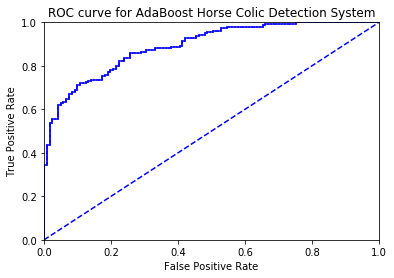

the Area Under the Curve is:  0.8918191104095092


In [19]:
plotROC(aggClassEst.T, labelArr)